**<font size=6> Data preparation<font size=6>**

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

from scipy.signal import convolve

In [ ]:
# parameters
inputfile = 'data/data_3layer_nowave.npz'
inputdata = np.load(inputfile)

# Receivers
r = inputdata['r']
dr = r[0, 1]-r[0, 0]
nr = r.shape[1]

# Sources
s = inputdata['s']
ds = s[1, 1]-s[1, 0]
ns = s.shape[1]

# models
rho = inputdata['rho']
vel = inputdata['vel']

# Time axis
t = inputdata['t']
ot, dt, nt = t[0], t[1]-t[0], len(t)

# Axes
x, z = inputdata['x'], inputdata['z']
dx, dz = x[1] - x[0], z[1] - z[0]

# pressure and velocities
p   = inputdata['p']         # organized as (S, R, T)


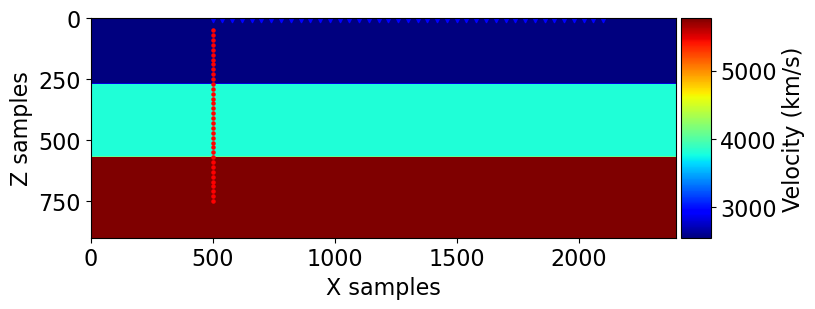

In [4]:
plt.figure(figsize=(8,8))
plot = plt.imshow(vel,cmap='jet',origin='upper',extent = (x[0], x[-1], z[-1], z[0]))
plt.xlabel("X samples")
plt.ylabel("Z samples")
plt.scatter(s[0, 0::10], s[1, 0::10], marker='o', s=5, c='r')
plt.scatter(r[0, 0::10],  r[1, 0::10], marker='v', s=20, c='b')
ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(plot, cax=cax)
cbar.set_label('Velocity (km/s)')

plt.show()

(500.0, 2100.0, 2.932, 0.0)

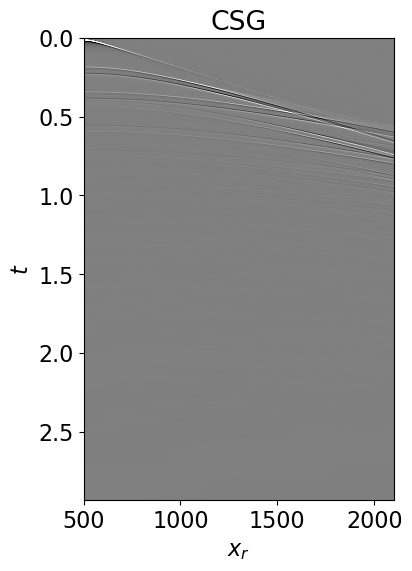

In [5]:
plt.figure(figsize=(4,6))
plt.imshow(p[0].T, cmap='gray', vmin=-0.1*np.abs(p).max(), 
              vmax=0.1*np.abs(p).max(), extent=(r[0,0], r[0,-1], t[-1], t[0]))
plt.xlabel(r'$x_r$')
plt.ylabel(r'$t$')
plt.title('CSG')
plt.axis('tight')

(50.0, 750.0, 2.932, 0.0)

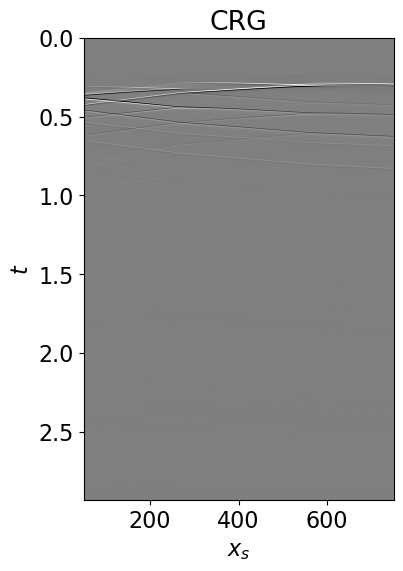

In [6]:
plt.figure(figsize=(4,6))
plt.imshow(p[:,nr//2].T, cmap='gray', vmin=-0.1*np.abs(p).max(), 
              vmax=0.1*np.abs(p).max(), extent=(s[1,0], s[1,-1], t[-1], t[0]))
plt.xlabel(r'$x_s$')
plt.ylabel(r'$t$')
plt.title('CRG')
plt.axis('tight')

### Convolve with noise

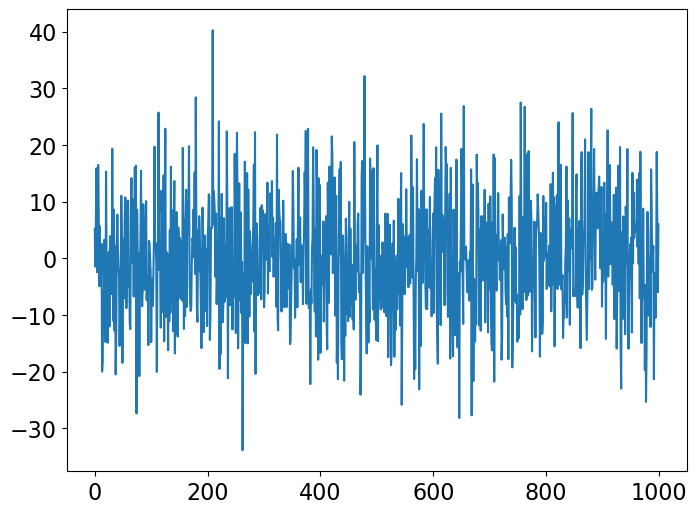

In [7]:
np.random.seed(42)
# Generate random noise with a mean of 0 and standard deviation of 1
noise = np.random.normal(loc=0, scale=p.max()*0.1, size=p.shape[-1])

plt.plot(noise[:1000])

In [19]:
# Initialize p_noise with the same shape as p to store convolved results
p_noise = np.empty((351, 401, 1467*2-1))

# Loop through each source and convolve with a randomly shifted version of noise
for src in range(p.shape[0]):
    # Generate a random shift for each source
    random_shift = np.random.randint(0, len(noise))
    noise_shifted = np.roll(noise, random_shift)

    # Convolve along the last axis for each receiver and time sample in the source
    p_noise[src] = dt * np.apply_along_axis(convolve, -1, p[src], noise_shifted, mode='full')

(500.0, 2100.0, 2.932, 0.0)

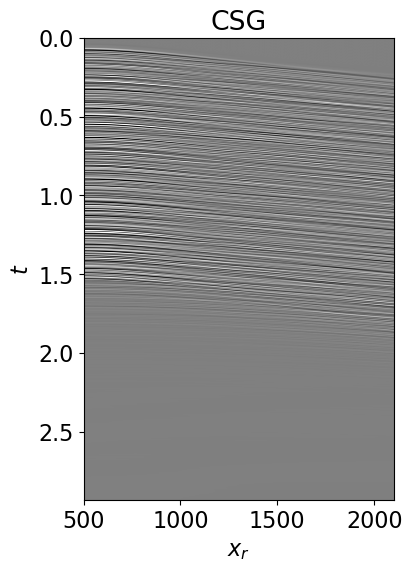

In [11]:
plt.figure(figsize=(4,6))
plt.imshow(p_noise[ns//2].T, cmap='gray', vmin=-0.1*np.abs(p_noise).max(), 
              vmax=0.1*np.abs(p_noise).max(), extent=(r[0,0], r[0,-1], t[-1], t[0]))
plt.xlabel(r'$x_r$')
plt.ylabel(r'$t$')
plt.title('CSG')
plt.axis('tight')

(1.5, 0.0)

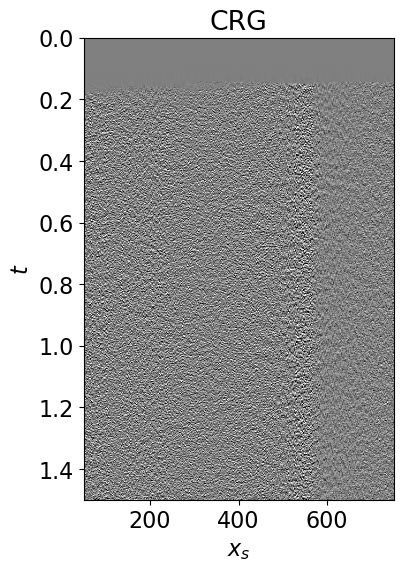

In [20]:
plt.figure(figsize=(4,6))
plt.imshow(p_noise[:,nr//2].T, cmap='gray', vmin=-0.1*np.abs(p_noise).max(), 
              vmax=0.1*np.abs(p_noise).max(), extent=(s[1,0], s[1,-1], t[-1], t[0]))
plt.xlabel(r'$x_s$')
plt.ylabel(r'$t$')
plt.title('CRG')
plt.axis('tight')
plt.ylim(1.5, 0)

In [ ]:
np.savez('data/data_noise.npz', p=p_noise, t=t, r=r, s=s, x=x, z=z, vel=vel, rho=rho)